In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_name = 'pcmac_results.csv'
results = pd.read_csv(file_name)

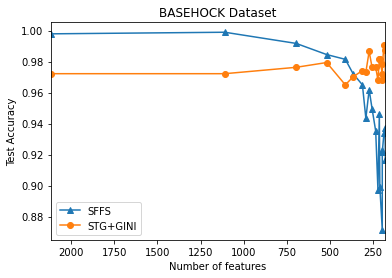

In [4]:
import matplotlib.pyplot as plt
x = results['STG_feats']
#plt.plot(results['STG_feats'], results['STG_acc'], label='STG', )
plt.plot(results['STG_feats'], results['SFFS_acc'], label='SFFS', marker='^')
# plt.plot(results['STG_feats'], results['DualSTG_acc'], label='DualSTG')
plt.plot(results['STG_feats'], results['GINI_acc'], label='STG+GINI', marker='o')
plt.xlim(max(x), min(x))
plt.legend()
plt.xlabel('Number of features')
plt.ylabel('Test Accuracy')
# Modify ur Title
plt.show()

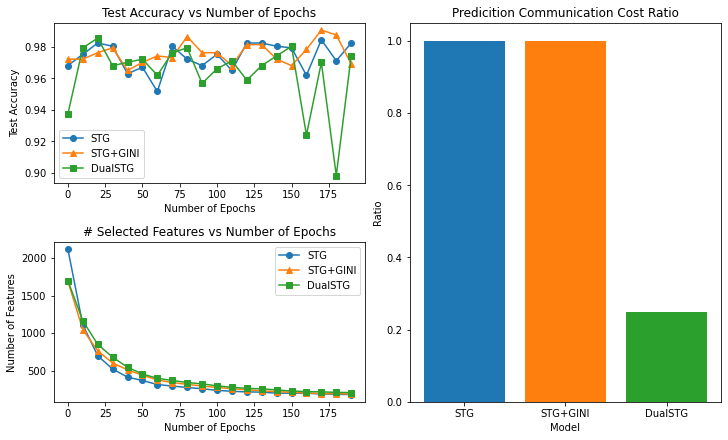

In [7]:
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              figsize=(10, 6), constrained_layout=True)
axd['upper left'].plot(np.arange(0, 200, 10), results['STG_acc'], label='STG', marker='o')
axd['upper left'].plot(np.arange(0, 200, 10), results['GINI_acc'], label='STG+GINI', marker='^')
axd['upper left'].plot(np.arange(0, 200, 10), results['DualSTG_acc'], label='DualSTG', marker='s')
axd['upper left'].legend()
axd['upper left'].set_xlabel('Number of Epochs')
axd['upper left'].set_ylabel('Test Accuracy')
axd['upper left'].set_title('Test Accuracy vs Number of Epochs')

axd['lower left'].plot(np.arange(0, 200, 10), results['STG_feats'], label='STG', marker='o')
axd['lower left'].plot(np.arange(0, 200, 10), results['GINI+STG_feats'], label='STG+GINI', marker='^')
axd['lower left'].plot(np.arange(0, 200, 10), results['DualSTG_feats'], label='DualSTG', marker='s')
axd['lower left'].set_xlabel('Number of Epochs')
axd['lower left'].set_ylabel('Number of Features')
axd['lower left'].set_title('# Selected Features vs Number of Epochs')
axd['lower left'].legend()


group_names = ['STG', 'STG+GINI', 'DualSTG']
values = [1, 1, results.tail(1)['pred_emb'].item()/24]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
axd['right'].bar(group_names, values, align='center', color=colors)
axd['right'].set_xlabel('Model')
axd['right'].set_ylabel('Ratio')
axd['right'].set_title('Predicition Communication Cost Ratio')
# Title
# Save
plt.show()